### 4.10 Part 1.25 Yang New Customer
#### 1 - importing libraries
#### 2 - Importing df
#### 3 - Analyzing  by Frequent Flag
#### 4 - Analyzing Purshases by Income
#### 5 - Analyzing by Busiest_day
#### 6 - Analyzing number by State
#### 7 - Analyzing by n_dependants
#### 8 - Analyzing Days since prior order
#### 9 - Defining TOP products for client group

### 1 Importing libraries and df w/o PII

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

### 2 Importing df

In [3]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','0YNC.pkl'))

In [4]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag'],
      dtype='object')

In [5]:
df.shape

(1461002, 30)

In [6]:
df[['user_id','Age', 'income','product_id', 'order_number','mean_price']] .describe()

,user_id,Age,income,product_id,order_number,mean_price
count,1.461002e+06,1.461002e+06,1.461002e+06,1.461002e+06,1.461002e+06,1.461002e+06
mean,1.035408e+05,2.888721e+01,6.895287e+04,2.521548e+04,4.076788e+00,1.395043e+01
std,5.959099e+04,6.600387e+00,2.398956e+04,1.438950e+04,2.209809e+00,1.246759e+02
min,4.000000e+00,1.800000e+01,2.590300e+04,0.000000e+00,1.000000e+00,1.000000e+00
25%,5.215000e+04,2.300000e+01,5.481400e+04,1.317600e+04,2.000000e+00,7.309589e+00
50%,1.040800e+05,2.900000e+01,6.799600e+04,2.496400e+04,4.000000e+00,7.828061e+00
75%,1.553830e+05,3.500000e+01,8.354000e+04,3.775400e+04,6.000000e+00,8.332031e+00
max,2.061980e+05,4.000000e+01,3.853240e+05,4.968800e+04,1.000000e+01,1.020999e+04


### 3 -Analyzing YNC by Frequent Flag

#### --creating the subset to avoid Memory Error

In [7]:
df1=df[['user_id','fam_status','frequent_flag']]

In [8]:
df11=df1.drop_duplicates().reset_index()

In [9]:
df11

,index,user_id,fam_status,frequent_flag
0,19,65803,married,Frequent customer
1,497,8794,married,Frequent customer
2,1362,168047,married,Regular customer
3,1990,23357,single,Non-frequent customer
4,2084,76694,married,Frequent customer
...,...,...,...,...
21825,4231416,186530,married,Non-frequent customer
21826,4347018,179450,married,Frequent customer
21827,4578719,73043,single,Frequent customer
21828,4754176,10625,living with parents and siblings,Frequent customer


#### -analyzing YNC by Frequent_flag and Family Status based on customers number

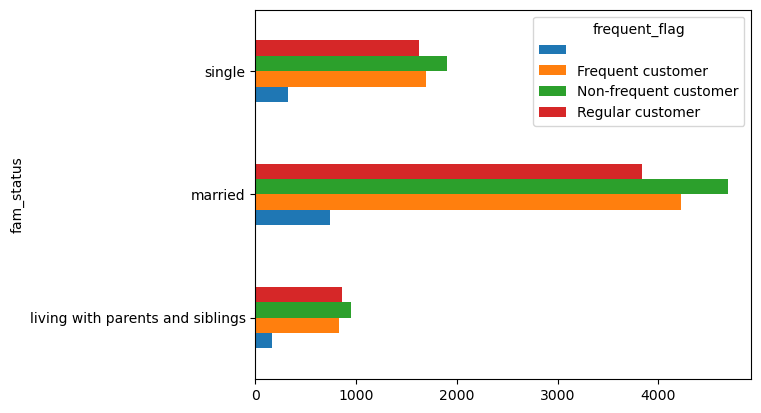

In [10]:
bar12=df11.groupby('fam_status')['frequent_flag'].value_counts().unstack().plot.barh()

In [11]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'YNC_LoyaltyFlag.png'))

In [12]:
df11.groupby('fam_status')['frequent_flag'].value_counts()

fam_status                        frequent_flag        
living with parents and siblings  Non-frequent customer     948
                                  Regular customer          856
                                  Frequent customer         830
                                                            166
married                           Non-frequent customer    4688
                                  Frequent customer        4222
                                  Regular customer         3837
                                                            745
single                            Non-frequent customer    1897
                                  Frequent customer        1691
                                  Regular customer         1627
                                                            323
Name: frequent_flag, dtype: int64

### -analyzing YNC by Frequent flag and Family Status based on purchase number

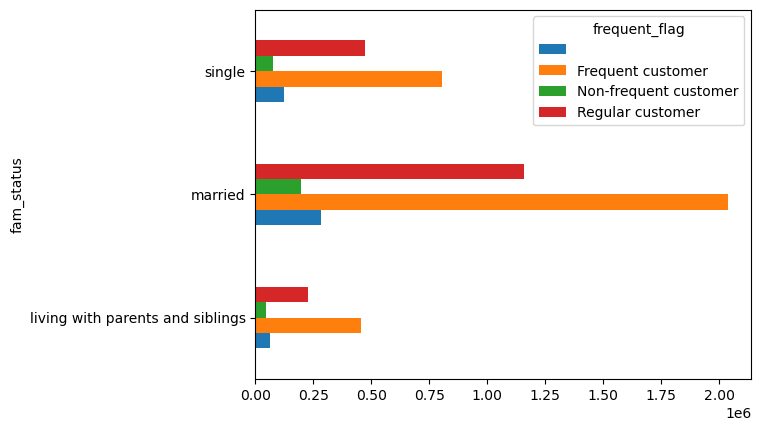

In [15]:
bar12=df1.groupby('fam_status')['frequent_flag'].value_counts().unstack().plot.barh()

In [13]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'YNC_LoyaltyFlagSales.png'))

In [14]:
df11.groupby('fam_status')['frequent_flag'].value_counts()

fam_status                        frequent_flag        
living with parents and siblings  Non-frequent customer     948
                                  Regular customer          856
                                  Frequent customer         830
                                                            166
married                           Non-frequent customer    4688
                                  Frequent customer        4222
                                  Regular customer         3837
                                                            745
single                            Non-frequent customer    1897
                                  Frequent customer        1691
                                  Regular customer         1627
                                                            323
Name: frequent_flag, dtype: int64

### 4 -analyzing YNC purshases by their income

In [15]:
df2=df[['prices', 'income']]

In [16]:
df2['prices'].sum()

20096403.3

In [17]:
df22=df2.groupby('income').agg(mean_purshase=('prices','mean'))

In [18]:
df22

,mean_purshase
income,
25903,3.214286
25911,6.444828
25937,6.807500
25941,5.500000
25991,6.411429
...,...
368295,192.856790
371653,3233.061290
376599,3398.111017


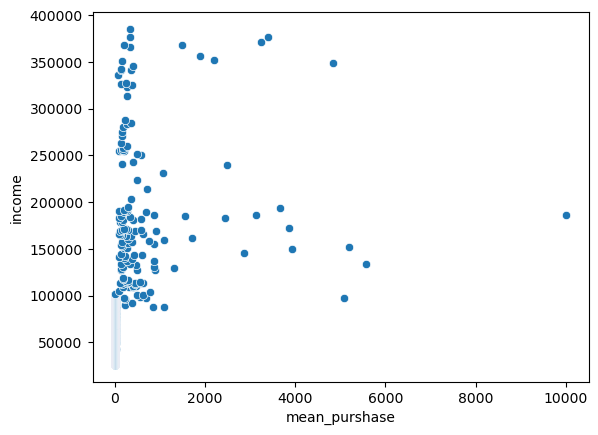

In [19]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22)

#### filter extrem big values

In [20]:
df22filtered=df22[df22['mean_purshase']<600]

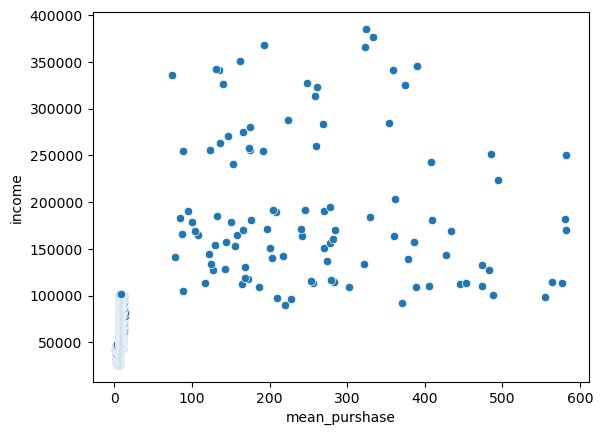

In [21]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22filtered)

In [22]:
scat3.figure.savefig(os.path.join(path, 'Prepared Data', 'YNC_PricesIncome.png'))

### 5 - Analyzing YNC by Busiest_day

In [23]:
df4=df[['user_id','STATE', 'busiest_day', 'day_of_week']]

In [24]:
df4

,user_id,STATE,busiest_day,day_of_week
19,65803,Idaho,Busiest days,1
20,65803,Idaho,Busiest days,1
21,65803,Idaho,Busiest days,1
22,65803,Idaho,Busiest days,0
23,65803,Idaho,Slowest days,4
...,...,...,...,...
6464309,75529,West Virginia,Regularly days,2
6464310,75529,West Virginia,Slowest days,4
6464311,75529,West Virginia,Regularly days,5
6464312,75529,West Virginia,Busiest days,0


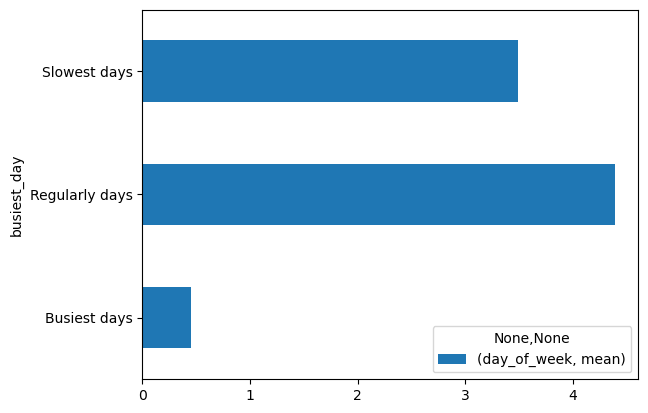

In [25]:
bar14=df4.groupby('busiest_day').agg({'day_of_week':['mean']}).plot.barh()

In [26]:
bar14.figure.savefig(os.path.join(path, 'Prepared Data', 'YNC_BusiestDayOfWeek.png'))

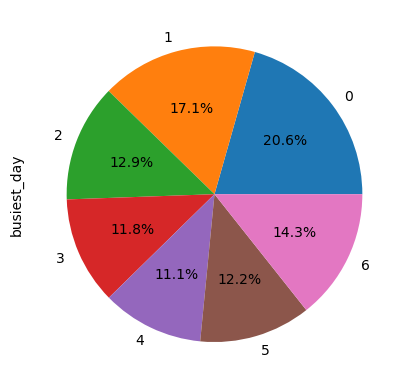

In [27]:
pie24=df4.groupby('day_of_week')['busiest_day'].count().plot(kind='pie', autopct='%0.01f%%')

In [28]:
df4.groupby('day_of_week')['busiest_day'].count()

day_of_week
0    300935
1    249916
2    187894
3    172036
4    162414
5    178383
6    209424
Name: busiest_day, dtype: int64

In [29]:
pie24.figure.savefig(os.path.join(path, 'Prepared Data', 'YNC_pieBusiestDayOfWeek.png'))

### -YNC prefered hour of day

In [30]:
df44=df[['order_hour_of_day','user_id']]

In [31]:
df44.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0      11130
1       6338
2       3773
3       3253
4       2916
5       4024
6      10340
7      31582
8      62446
9      93253
10    116000
11    123629
12    118187
13    125197
14    124644
15    127315
16    123708
17    105144
18     82199
19     62982
20     44337
21     33951
22     27412
23     17242
Name: user_id, dtype: int64

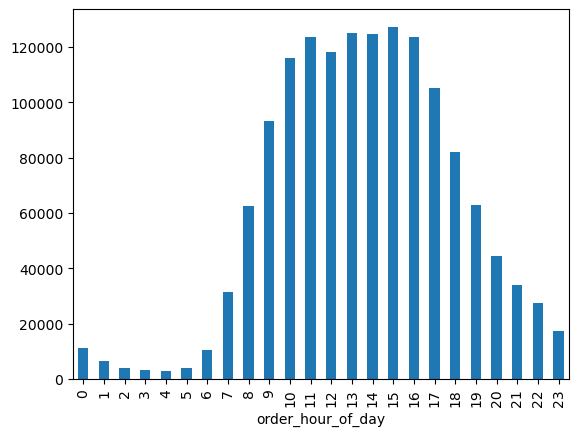

In [32]:
bar44=df44.groupby('order_hour_of_day')['user_id'].count().plot.bar()

In [33]:
bar44.figure.savefig(os.path.join(path, 'Prepared Data', 'YNC_BusiestHourOfDay.png'))

### 6 - Analyzing number of YNC by State

In [45]:
df5=df[['user_id','STATE']]

In [46]:
DF5=df5.drop_duplicates().reset_index()

In [47]:
DF5

,index,user_id,STATE
0,19,65803,Idaho
1,497,8794,Nebraska
2,1362,168047,Alaska
3,1990,23357,Wisconsin
4,2084,76694,South Carolina
...,...,...,...
21825,4231416,186530,Nevada
21826,4347018,179450,Oregon
21827,4578719,73043,Georgia
21828,4754176,10625,Kansas


#### number of rows indicate total number of YNC =21830

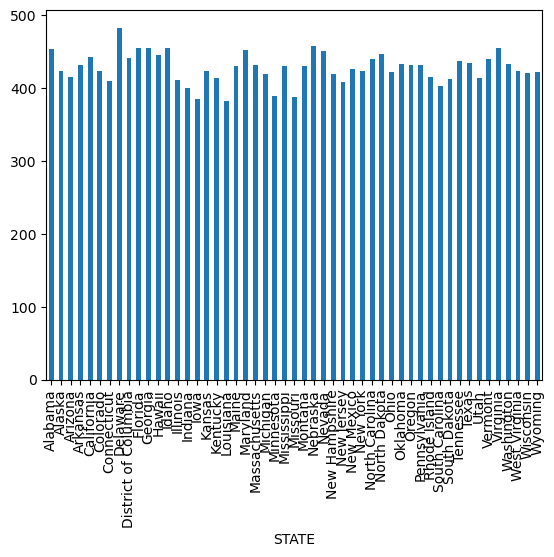

In [48]:
bar15=DF5.groupby('STATE')['user_id'].count().plot.bar()

In [49]:
DF5.groupby('STATE')['user_id'].count()

STATE
Alabama                 454
Alaska                  424
Arizona                 415
Arkansas                432
California              443
Colorado                423
Connecticut             410
Delaware                483
District of Columbia    442
Florida                 455
Georgia                 455
Hawaii                  446
Idaho                   455
Illinois                411
Indiana                 400
Iowa                    385
Kansas                  423
Kentucky                414
Louisiana               383
Maine                   430
Maryland                453
Massachusetts           432
Michigan                419
Minnesota               389
Mississippi             431
Missouri                388
Montana                 430
Nebraska                458
Nevada                  451
New Hampshire           420
New Jersey              409
New Mexico              426
New York                423
North Carolina          440
North Dakota            447
Ohio          

#### -defining 10 Top States

In [50]:
DF5.groupby('STATE')['user_id'].count().sort_values(ascending=False).head(10)

STATE
Delaware        483
Nebraska        458
Virginia        455
Idaho           455
Georgia         455
Florida         455
Alabama         454
Maryland        453
Nevada          451
North Dakota    447
Name: user_id, dtype: int64

#### -saving the plot

In [51]:
bar15.figure.savefig(os.path.join(path, 'Prepared Data', 'YNC_UsersNumberState.png'))

### 7 - Analyzing YNC by n_dependants

In [52]:
df6=df[['user_id', 'n_dependants']]

In [53]:
DF6=df6.drop_duplicates()

In [54]:
DF6.groupby(['n_dependants'])['user_id'].count()

n_dependants
0    5538
1    5478
2    5467
3    5347
Name: user_id, dtype: int64

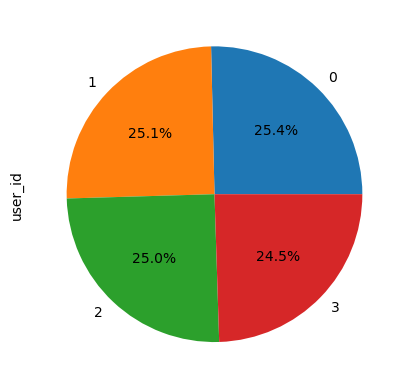

In [55]:
pie16=DF6.groupby(['n_dependants'])['user_id'].count().plot(kind='pie', autopct='%0.01f%%')

In [56]:
DF6

,user_id,n_dependants
19,65803,2
497,8794,3
1362,168047,3
1990,23357,0
2084,76694,3
...,...,...
4231416,186530,3
4347018,179450,1
4578719,73043,0
4754176,10625,2


#### saving the plot

In [57]:
pie16.figure.savefig(os.path.join(path, 'Prepared Data', 'YNC_NDependansUsers.png'))

### 8 - Analyzing YNC Days since prior order

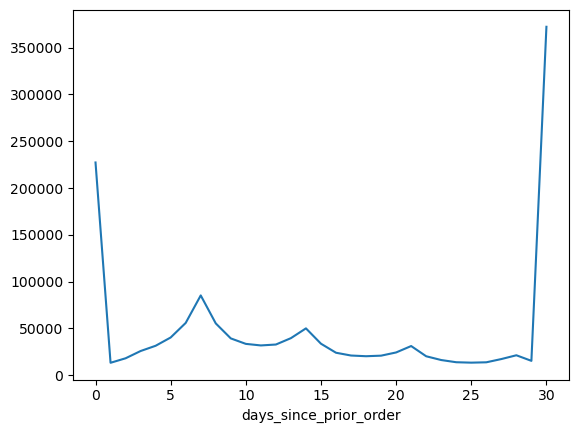

In [58]:
line17=df.groupby('days_since_prior_order')['days_since_prior_order'].count().plot(kind='line')

In [59]:
df.groupby('days_since_prior_order')['days_since_prior_order'].count()

days_since_prior_order
0     227248
1      13370
2      18168
3      25927
4      31535
5      40381
6      55928
7      85296
8      55426
9      39403
10     33559
11     31891
12     32865
13     39670
14     50113
15     33733
16     24088
17     21118
18     20378
19     20973
20     24401
21     31240
22     20329
23     16301
24     13955
25     13508
26     13884
27     17345
28     21394
29     15440
30    372135
Name: days_since_prior_order, dtype: int64

In [60]:
line17.figure.savefig(os.path.join(path, 'Prepared Data', 'YNC_DaysSincePriorOrder.png'))

### 9- Defining YNC TOP products for client group


 #### creating subset

In [61]:
df18=df[['product_name','product_id','prices']]

In [62]:
df18

,product_name,product_id,prices
19,Soda,196,9.0
20,Organic Mushroom & Olive Pizza,4428,10.0
21,Tortilla Crusted Tilapia,4432,8.6
22,Supremo Pork Chorizo 12 Oz.,7337,24.1
23,Strawberry Frozen Greek Yogurt Bars,13417,4.3
...,...,...,...
6464309,Organic Whole Milk,31720,9.3
6464310,Organic Whole Milk,31720,9.3
6464311,Fresh Mozzarella Ball,37524,4.7
6464312,Organic Ginger Root,46667,6.9


#### identifying the most populare products counting orders rows  and selecting 10 TOP 

In [63]:
DF18=df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index().head(10)

In [64]:
DF18

,product_name,prices
0,,23086
1,Banana,19000
2,Bag of Organic Bananas,14024
3,Organic Baby Spinach,9780
4,Organic Strawberries,8892
5,Organic Avocado,8678
6,Large Lemon,7290
7,Organic Hass Avocado,7064
8,Strawberries,6510
9,Limes,5857


In [65]:
DF18=DF18.rename(columns={'prices':'count_orders'})

In [66]:
DF18=DF18.drop(index=0)

In [67]:
DF18

,product_name,count_orders
1,Banana,19000
2,Bag of Organic Bananas,14024
3,Organic Baby Spinach,9780
4,Organic Strawberries,8892
5,Organic Avocado,8678
6,Large Lemon,7290
7,Organic Hass Avocado,7064
8,Strawberries,6510
9,Limes,5857


#### -creating plot

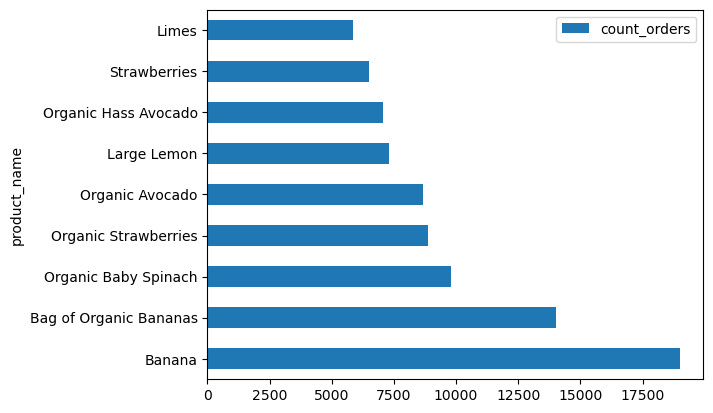

In [68]:
Bar21=DF18.plot.barh(x='product_name')

#### -saving the plot

In [69]:
Bar21.figure.savefig(os.path.join(path, 'Prepared Data', 'YNC_Products.png'))